# Assignment 2

## Group 32

*  Prerak Gupta - 03717790
*  Chen Zhiyue - 03721645
*  Jonathan Narvaez - 03708467
*  Hao Ma - 03721529
*  Zhen Zhou - 03721400

## Principal Component Analysis

### Task 1

Let $\mathit{X}\in\mathbb{R}^{p\times N},\mathit{p}\lt\mathit{N}$, be a centered matrix of $\mathit{p}\;\mathit{N}$-dimensional data samples with the full-size SVD  $\mathit{X}=\mathit{U}\mathit{\Sigma}\mathit{V}^T$. Assume that the singular values are sorted in a descending manner, i.e. $\sigma_{1,1}\geq ... \geq\sigma_{p,p}$.

* Provide a normalized vector $\hat{\mathit{s}}\in\mathit{R}^p$, such that
$$
\hat{\mathit{s}}=\arg\max_{\mathit{s}\;\text{s.t.}\;\|\mathit{s}\|=1}\mathit{s}^T\mathit{\Sigma\Sigma}^T\mathit{s}.
$$


* Show that the empirical variance of the inner products of the columns of  $\mathit{X}$ with a normalized vector  $\mathbf{a}$,
$$
\frac{1}{N}\sum_{i=1}^N(\mathit{a}^T\mathit{x}_i)^2=\frac{1}{N}\mathit{a}^T\mathit{XX}^T\mathit{a},
$$

is maximized when $\mathit{a}$, is set to the first column of $\mathit{U}$, i.e. $\mathit{a}=\mathit{u}_1$ (note that $\| \mathit{a}\|=1$).
Hint: Write $\mathit{a}$ as a linear combination of the columns of $\mathit{U}$. Verify that such a representation does not affect the norm constraint.

### Task 2

For this task, download the modified version of the *Yale Face Database* provided on Moodle (task2_data.zip). The *Yale Face Database B* consists of single light source images of 10 subjects, each seen in different poses and illumination conditions. In the provided form the database is divided into 5 subsets. In subset 0 the subject is illuminated by an almost frontal light source, while for subsets 1-4 the light source is gradually moved along the horizon. Subset 0 will serve as the training set, while subsets 1-4 are used for testing.

* 
Write a function that takes as an input matrix $\mathit{T}$ of vectorized images from subset 0. The output of this function are the 20 first singular vectors $\mathit{U}[:,1]\,,\;...\,,\;\mathit{U}[:,20]$. Display the first 3 vectors as images, i.e., reshape them to size $50\times50$ and display them.

In [1]:
import os
import cv2
import re
import operator
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

In [2]:
def vectorizedimage(path):
    path_list = os.listdir(path)
    path_list.sort()
    length = len(path_list)
    image = np.zeros((2500,length))
    label_list = []

    for filename,i in zip(path_list,np.arange(0,length,1)):
        label_str=re.sub("\D", "", filename)
        label_num=int(label_str[0:2])
        label_list.append(label_num)
        filename_join = os.path.join(path,filename)
        img = cv2.imread(filename_join,cv2.IMREAD_GRAYSCALE)
        image[:,i] = img.reshape(-1)
        label = np.array(label_list)
    return image,label

In [3]:
def extractU(T):
    U,s,VT = np.linalg.svd(T)
    U_out = U[:,0:20] 
    return U_out

(70,)


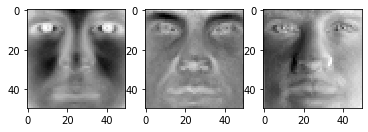

In [4]:
path0 = './yaleBfaces/subset0'
image0,label0 = vectorizedimage(path0)
U0_out = extractU(image0)
plt.subplot(1,3,1)
plt.imshow(U0_out[:,0].reshape((50,50)),'gray')
plt.subplot(1,3,2)
plt.imshow(U0_out[:,1].reshape((50,50)),'gray')
plt.subplot(1,3,3)
plt.imshow(U0_out[:,2].reshape((50,50)),'gray')
print(label0.shape)


* Write a function that takes as an input the training set $\mathit{T}$ (a matrix composed of vectorized pictures from subset 0), a vector containing the labels of the training set (i.e., if the $\mathit{i}$-th sample belongs to class $\mathit{j}$, the $\mathit{i}$-th entry of the labels vector is $\mathit{j}$. In this exercise $\mathit{j}$ is an integer between 1 and 10), the test samples $\mathit{S}$ (a matrix composed of vectorized pictures from subsets 1-4) and the corresponding labels (in a separate vector), the 20 singular vectors from the first step, and the parameter $\mathit{K}$ that denotes how many of the PCs are used. Use the Euclidean distance to classify each sample image based on its three nearest neighbors (this is done by comparing the test samples with the training samples in the reduced space.). As an output give the fraction of images from $\mathit{S}$ that were misclassified, i.e., the error rate. Repeat this for subsets 1 through 4 and for $\mathit{k}=1\,,\;...\,,\;20$. Plot the error rate for each subset.

In [9]:
def errorrate(T,T_label,S,S_label,U0_out,k):
    u_reduce = U0_out[:,0:k]
    T_reduce = np.dot(u_reduce.T,T)
    S_reduce = np.dot(u_reduce.T,S)
    Slabel_knn = np.zeros(shape(S_label))
    voteLabel = np.zeros((1,3))
    for i in np.arange(0,S.shape[1]):
        
        ## step 1: calculate Euclidean distance
        diff = S_reduce[:,i,None]-T_reduce
        squaredDiff = diff ** 2
        squaredDist = sum(squaredDiff,axis = 0)
        distance = squaredDist ** 0.5
        
        ## step 2: sort the distance
        sortedDistIndices = argsort(distance)
        
        sortindex = sortedDistIndices[0:3]
        
        voteLabel = T_label[sortindex]
        if voteLabel[0] != voteLabel[1] and voteLabel[1] != voteLabel[2] and voteLabel[0] != voteLabel[2]:
            maxIndex = voteLabel[0]
        else:
            appear_times = np.bincount(voteLabel)    # label n appears m times
            maxIndex = np.argmax(appear_times)   # choose max times as maxindex            
        
        Slabel_knn[i] = maxIndex
       
    
    
    error = np.sum(S_label!=Slabel_knn,axis = 0)
    errorrate = error/S_label.size
        
    return errorrate

In [10]:
path1 = './yaleBfaces/subset1'
Test_set1,Test_label1 = vectorizedimage(path1)
path2 = './yaleBfaces/subset2'
Test_set2,Test_label2 = vectorizedimage(path2)
path3 = './yaleBfaces/subset3'
Test_set3,Test_label3 = vectorizedimage(path3)
path4 = './yaleBfaces/subset4'
Test_set4,Test_label4 = vectorizedimage(path4)

[0.81666667 0.55833333 0.6        0.41666667 0.3        0.20833333
 0.15       0.14166667 0.125      0.11666667 0.11666667 0.05833333
 0.05833333 0.05833333 0.05833333 0.05833333 0.05833333 0.05833333
 0.05833333 0.05833333]


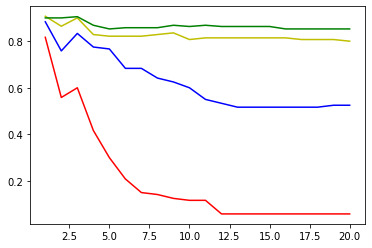

In [11]:
e1 = np.zeros(20)
e2 = np.zeros(20)
e3 = np.zeros(20)
e4 = np.zeros(20)
krange = np.arange(1,21)
for k in krange:
    e1[k-1] = errorrate(image0,label0,Test_set1,Test_label1,U0_out,k)
    e2[k-1] = errorrate(image0,label0,Test_set2,Test_label2,U0_out,k)
    e3[k-1] = errorrate(image0,label0,Test_set3,Test_label3,U0_out,k)
    e4[k-1] = errorrate(image0,label0,Test_set4,Test_label4,U0_out,k)
plt.plot(krange,e1,color = 'r')
plt.plot(krange,e2,color = 'b')
plt.plot(krange,e3,color = 'y')
plt.plot(krange,e4,color = 'g')
print(e1)

* Repeat the above experiment without using the first three singular vectors, i.e., use $\mathit{K}=1\,,\;...\,,\;17$ singular vectors starting from the 4-th. Plot the error rate as before. How do you explain the difference in recognition rate?

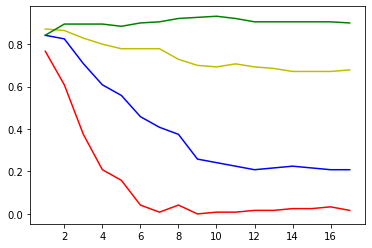

In [12]:
U0_new = U0_out[:,3:20]

e1 = np.zeros(17)
e2 = np.zeros(17)
e3 = np.zeros(17)
e4 = np.zeros(17)
krange = np.arange(1,18)
for k in krange:
    e1[k-1] = errorrate(image0,label0,Test_set1,Test_label1,U0_new,k)
    e2[k-1] = errorrate(image0,label0,Test_set2,Test_label2,U0_new,k)
    e3[k-1] = errorrate(image0,label0,Test_set3,Test_label3,U0_new,k)
    e4[k-1] = errorrate(image0,label0,Test_set4,Test_label4,U0_new,k)
plt.plot(krange,e1,color = 'r')
plt.plot(krange,e2,color = 'b')
plt.plot(krange,e3,color = 'y')
plt.plot(krange,e4,color = 'g')